# Case Study 2: Amazon Review based Product Rating

We have used the Toys and Games 5-core dataset from [Amazon Product review Dataset](http://jmcauley.ucsd.edu/data/amazon/).  We have to convert given reviews into features which can be used for rating the product. Each review can have an integer rating value from 1 to 5. 

**Few Reviews with rating 5: **
1. I like the item pricing. My granddaughter wanted to mark on it but I wanted it just for the letters.
2. Bought one a few years ago for my daughter and she loves it, still using it today. For the holidays we bought one for our niece and she loved it too

**Few Reviews with rating 1:**
1. no more taking Irish car bombs with strange Australian women who can drink like rockstars...my head hurts.


Let's try to make a sentiment Analyzer using this dataset which has 167,597 reviews. The Ground truth is in range of 1-5 from 1 being bad review to 5 being good review.

In [2]:
###Load the Dataset
import pandas as pd
dataFrame = pd.read_csv("../Datasets/product_rating.csv")

# Convert data into array
data = dataFrame.values
n = dataFrame.shape[0] ## n is number of tweets
print(n)
#print(dataFrame)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


167597


## Exercise 1
Modify the reviews such that the irrelevant words and characters are removed. To this end apply the following preprocessing.
1. **Case** Convert the reviews to lower case.
2. **URLs** We don't intend to follow the (short) urls and determine the content of the site, so we can eliminate all of these URLs via regular expression matching or replace with generic word URL.
3. **Username** We can eliminate "$@$username" via regex matching or replace it with generic word AT\_USER
4. **hashtag** hash tags can give us some useful information, so replace them with the exact same word without the hash. E.g. \#nike replaced with 'nike'.
5. **Whitespace** Replace multiple whitespaces with a single whitespace.
6. **Stop words** a, is, the, with etc. The full list of stop words can be found at Stop Word List. These words don't indicate any sentiment and can be removed.
7. **Repeated letters** Sometimes people repeat letters to stress the emotion. "aaaaawesome" for awesome. We can look for 2 or more repetitive letters in words and replace them by 2 of the same.
8. **Punctuation** Remove punctuation such as comma, single/double quote, question marks at the start and end of each word. E.g. beautiful!!!!!! replaced with beautiful
9. **Non-alpha Words**  Remove all those words which don't start with an alphabet. E.g. 15th, 5.34am

After preprocessing you should have obtain as shown below:

Can you write your code for pre processing?

In [3]:
##Stored labels and tweets in separate arrays for train data
reviews = data[:,1]
labels = data[:,2]
#print(reviews.shape, reviews[:10])
#print(ratings.shape, ratings[:10])

In [4]:
## Your code here
## Preprocess the reviews

## import regex
import re
import numpy as np

PUNCTUATIONS = '\'"?!,.;:'

#start process_review
def processReview(review):
    # process the reviews

    #Convert to lower case
    review = review.lower()
    #Convert www.* or https?://* to URL
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',review)
    #Convert @username to AT_USER
    review = re.sub('@[^\s]+','AT_USER',review)
    #Remove additional white spaces
    review = re.sub('[\s]+', ' ', review)
    #Replace #word with word
    review = re.sub(r'#([^\s]+)', r'\1', review)
    #trim
    review = review.strip('\'"')
    review = review.strip('.,')
    
    review = review.strip(PUNCTUATIONS)
    review = replaceTwoOrMore(review)
    return review

#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

for i in range(100):
    reviews[i] = processReview(reviews[i])

#print(reviews[0:100])

## Exercise 2
Write the code to count the number of positive and negative words in each product review? You can use [Positive_words.txt](https://drive.google.com/drive/folders/1TnJCyn4LiS6InT35skvCbbBrp37AGYc) and [Negative words.txt](https://drive.google.com/drive/folders/1TnJCyn4LiS6InT35skvCbbBrp37AGYcT}{negative\_words.txt) which contain positive words and negative words respectively?

In [7]:
## your code here
#start getStopWordList

    
import numpy as np
    
def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('AT_USER')
    stopWords.append('URL')

    for stopWord in open(stopWordListFileName, 'r'):
        stopWords.append(stopWord)
    return stopWords
#end

#start getfeatureVector
def getFeatureVector(review):
    featureVector = []
    words = review.split()
    PUNCTUATIONS = '\'"?!,.;:'    
    for w in words:
        # strip punctuation
        w = w.strip(PUNCTUATIONS)
        # check if the word starts with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
 
        #ignore if it is a stop word
        
        if w in stopWords or val is None:
            continue
        else:
            featureVector.append(w.lower())
    return featureVector

def getwordcount(words, count):    
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    
    total = []
    #print words
    
    for w in words:        
        if w in positive_words:
            positive_count += 1
        elif w in negative_words:
            negative_count += 1
        else:
            neutral_count += 1
            
    total.append(positive_count)
    total.append(negative_count)
    total.append(neutral_count)
    total.append(labels[count])
    return total
    


stopWords = getStopWordList('../Datasets/stopwords.txt')
positive_words = pd.read_csv('../Datasets/positive-words.txt').values
negative_words=  pd.read_csv('../Datasets/negative-words.txt').values

#function to check missing values
def is_nan(x):
    return (x is np.nan or x != x)

def getFeatures(reviews, n) :    
    reviews_modified = []
    for i in range(n):
        if(i%1000 == 0) :
            print("%6d" %(i), end="")
        if(i%10000 == 0) :
            print()
        #print(reviews[i])
        if(is_nan(reviews[i]) == False):
            featureVector = getFeatureVector(reviews[i])
            #print(featureVector)
            reviews_modified.append(getwordcount(featureVector,i))
    x = np.asarray(reviews_modified) ###Converting in to array
    return x


In [8]:
is_nan(reviews[2339])

True

In [ ]:
#Calling the function

In [9]:
x = getFeatures(reviews, n)

     0
  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000
 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000
 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000
 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000
 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000
 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000
 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000
 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000
 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000
 91000 92000 93000 94000 95000 96000 97000 98000 99000100000
101000102000103000104000105000106000107000108000109000110000
111000112000113000114000115000116000117000118000119000120000
121000122000123000124000125000126000127000128000129000130000
131000132000133000134000135000136000137000138000139000140000
141000142000143000144000145000146000147000148000149000150000
151000152000153000154000155000156000157000158000159000160000
16100016200016300

In [ ]:
#dividing into train and test 

In [12]:
print (x.shape)

train_X = x[:150000,:2]
train_Y = x[:150000,3]
test_X = x[150000:,:2]
test_Y = x[150000:,3]
print(train_Y.shape)
print(test_Y.shape)

(167504, 4)
(150000,)
(17504,)


## Exercise  3
Take the one feature as the number of positive words and other as number of negative words for each review and use them in a KNN Classifier. What is the accuracy obtained?

In [13]:
## Your code here
from sklearn import neighbors
def getPredictions_KNN(train_X, trainY, test_X) :
    #using knn classifier from sklearn
    clf = neighbors.KNeighborsClassifier()
    clf.fit(train_X,train_Y)
    #returning the predicted values
    return (clf.predict(test_X))

pred_label = getPredictions_KNN(train_X, train_Y, test_X)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy :', accuracy_score(test_Y, pred_label))
print('precision :', precision_score(test_Y, pred_label, average='macro'))
print('recall : ', recall_score(test_Y, pred_label, average='macro'))

accuracy : 0.514396709324
precision : 0.290585512744
recall :  0.258261106579


## Exercise 4
Take the one feature as the number of positive words and other as number of negative words for each review and use them in a Linear Classifier. What is the accuracy obtained?

In [14]:
## Your code here
## Linear classifier
def getPredictions_LC(train_X, trainY, test_X) :
    from sklearn import linear_model
    clf = linear_model.SGDClassifier(max_iter=100)
    clf.fit(train_X,train_Y)
    return (clf.predict(test_X))

pred_label = getPredictions_LC(train_X, train_Y, test_X)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy :', accuracy_score(test_Y, pred_label))
print('precision :', precision_score(test_Y, pred_label, average='macro'))
print('recall : ', recall_score(test_Y, pred_label, average='macro'))


accuracy : 0.559700639854
precision : 0.16424985018
recall :  0.223403577809


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Exercise 5
Take the one feature as the number of positive words and other as number of negative words for each review and use them in a Naive Baeyes Classifier. What is the accuracy obtained?

In [15]:
## Your code here
## Your code here
## Linear classifier
def getPredictions_NB(train_X, trainY, test_X) :
    from sklearn import naive_bayes
    clf = naive_bayes.GaussianNB()
    clf.fit(train_X,train_Y)
    return (clf.predict(test_X))

pred_label = getPredictions_NB(train_X, train_Y, test_X)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy :', accuracy_score(test_Y, pred_label))
print('precision :', precision_score(test_Y, pred_label, average='macro'))
print('recall : ', recall_score(test_Y, pred_label, average='macro'))


accuracy : 0.558900822669
precision : 0.360400762171
recall :  0.224716401069


## Exercise 6
Calculate precision and Recall for the product review problem using all three classifiers and plot precision-Recall curve for all?

In [16]:
from sklearn.preprocessing import label_binarize
x_train = x[:150000,:2]
y_train = x[:150000,3]
x_test = x[150000:,:2]
y_test = x[150000:,3]
#y_train = label_binarize(Y_train, classes=[0, 1, 2, 3, 4, 5])


(3, 17504)
(52512,)
(3, 5)
(15,)


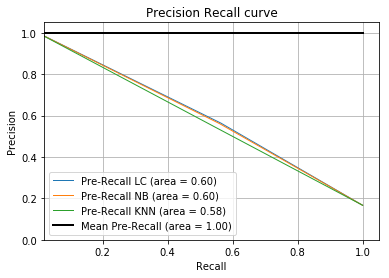

In [28]:
## Your code here
from matplotlib import pyplot as plt
from sklearn import naive_bayes, neighbors, linear_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, auc
import numpy

cv= {'NB' :naive_bayes.GaussianNB(), 'KNN' : neighbors.KNeighborsClassifier(), 'LC' : linear_model.SGDClassifier(max_iter=100) }

y_real = []
y_proba = []
for i, key in enumerate(cv):

    classifier = OneVsRestClassifier(cv.get(key))
    #classifier = cv.get(key)
    probas_ = classifier.fit(x_train, y_train).predict( x_test)
    y = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
    p = label_binarize(probas_, classes=[0, 1, 2, 3, 4, 5])

    precision, recall, thresholds = precision_recall_curve(y.ravel(), p.ravel())
    lab = 'Pre-Recall %s (area = %0.2f)' % (key, auc(recall, precision))
    plt.plot(recall, precision, lw=1, label=lab)

    y_real.append(y_test)
    y_proba.append(probas_)



y = MultiLabelBinarizer().fit_transform(y)

y = numpy.concatenate(y)


p = MultiLabelBinarizer().fit_transform(y_proba)
p = numpy.concatenate(p)

precision, recall, _ = precision_recall_curve(y, p)
lab = 'Mean Pre-Recall (area = %0.2f)' % (auc(recall, precision))
plt.plot(recall, precision, label=lab, lw=2, color='black') 
plt.xlim([0.02, 1.05])
plt.ylim([0, 1.05])
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.rcParams['axes.facecolor']='white'
plt.legend(loc="lower left")
plt.show()

In [62]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import numpy as np
random_state = np.random.RandomState(0)
X = x[:,:2]
Y1 = x[:,3]
classes=[1, 2, 3, 4, 5]
Y = label_binarize(Y1, classes=classes)
n_classes = Y.shape[1]
print(Y[0])
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3,random_state=random_state)

[0 0 0 0 1]


In [63]:
## Your code here
from matplotlib import pyplot as plt
from sklearn import naive_bayes, neighbors, linear_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
import numpy

cv= {'NB' :naive_bayes.GaussianNB(), 'KNN' : neighbors.KNeighborsClassifier(), 'LC' : linear_model.SGDClassifier(max_iter=100) }

precision = dict()
recall = dict()
average_precision = dict()

#for i, key in enumerate(cv):
key = 'LC'
classifier = OneVsRestClassifier(cv.get(key))
classifier.fit(X_train, Y_train)
if hasattr(classifier, "decision_function"):
    print('decision_funtion')
    prob_pos = classifier.decision_function( X_test)
else:
    print('proba')
    prob_pos = classifier.predict_proba(X_test)[:, 1]
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())    

for i in range(n_classes) :
    index = key + str(i) 
    precision[index], recall[index], _ = precision_recall_curve(Y_test[:, i], prob_pos[:, i])
    average_precision[index] = average_precision_score(Y_test[:, i], prob_pos[:, i])

precision[key], recall[key], _ = precision_recall_curve(Y_test.ravel(), prob_pos.ravel())
average_precision[key] = average_precision_score(Y_test, prob_pos)


decision_funtion


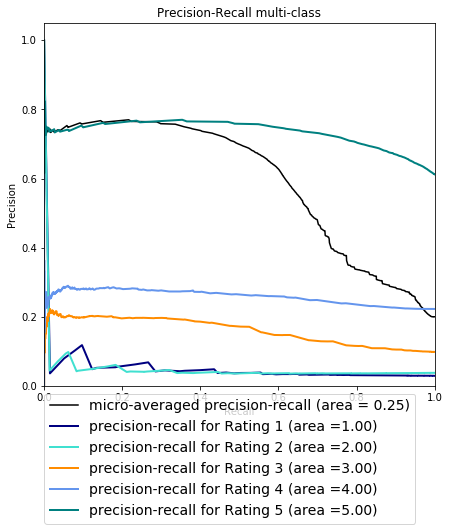

In [65]:
lines = []
labels =[]
from itertools import cycle

plt.figure(figsize=(7, 8))

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
l, = plt.plot(recall[key], precision[key], color='black')
lines.append(l)
labels.append('micro-averaged precision-recall (area = {0:0.2f})'
             ''.format(average_precision[key]))

for i, color in zip(range(n_classes), colors) :
    index = key+str(i)
    l, = plt.plot(recall[index], precision[index], color=color, lw=2)
    lines.append(l)
    labels.append('precision-recall for Rating {0} (area ={0:0.2f})'
                     ''.format(classes[i], average_precision[index]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))
plt.show()
